In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df= pd.read_csv('/content/Housing (1).csv')
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
df.shape

(545, 13)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [38]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [39]:
df.isnull().sum().sort_values(ascending=False)

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [40]:
(df.isnull().sum() / len(df)) * 100


,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [41]:
#separate numerical and categorical vdeatures
#imp step for regression
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include="object").columns

print("Numerical columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))


Numerical columns: 6
Categorical columns: 7


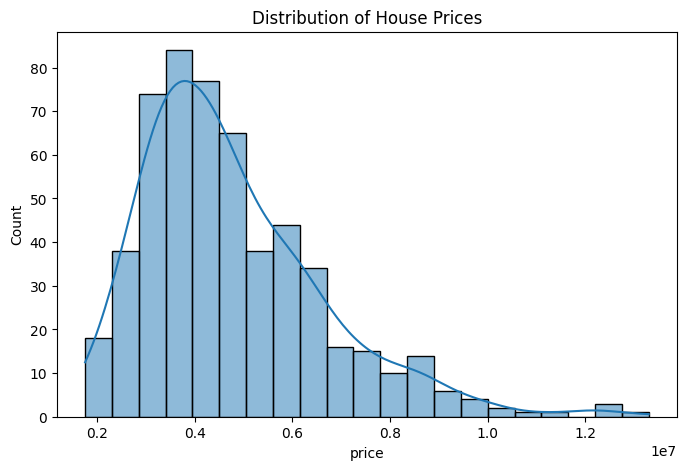

In [42]:
#target variables
plt.figure(figsize=(8,5))
sns.histplot(df["price"], kde=True)
plt.title("Distribution of House Prices")
plt.show()


In [43]:
#The target variable (house price) shows a right-skewed distribution, indicating the presence of high-priced outliers. This may affect linear regression performance and motivates the use of transformation techniques in preprocessing.”

In [44]:
df["price"].skew()


np.float64(1.2122388370279802)

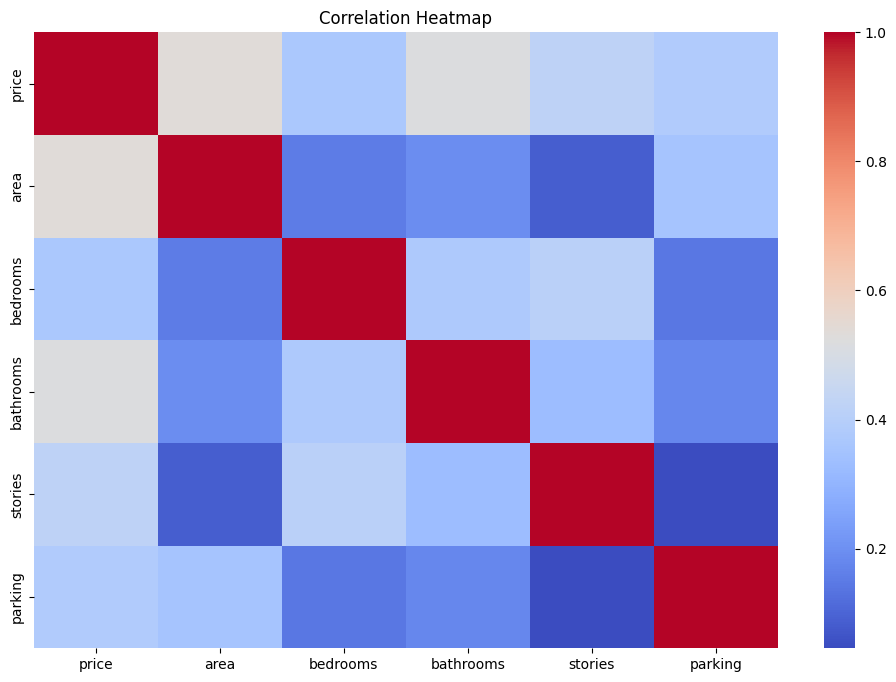

In [45]:
#Correlation analysis
plt.figure(figsize=(12,8))
corr = df[num_cols].corr()

sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


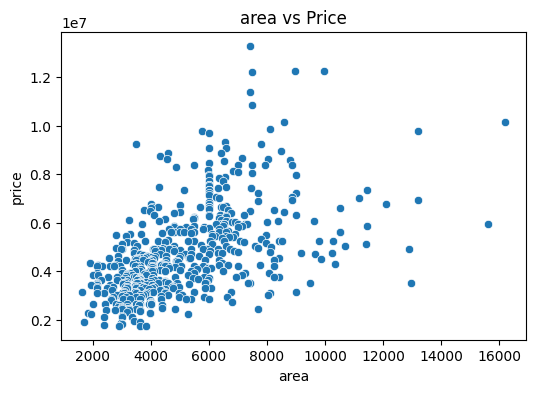

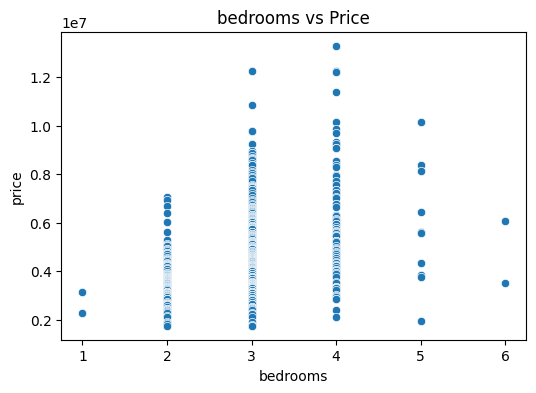

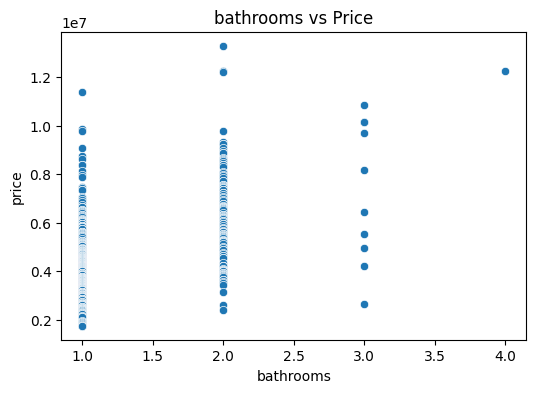

In [46]:
important_features = ["area", "bedrooms", "bathrooms"]  # adjust

for col in important_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["price"])
    plt.title(f"{col} vs Price")
    plt.show()


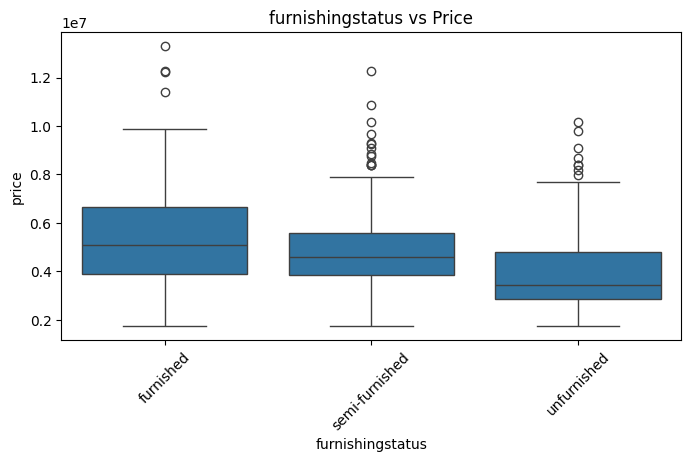

In [47]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["furnishingstatus"], y=df["price"])
plt.xticks(rotation=45)
plt.title("furnishingstatus vs Price")
plt.show()


In [48]:
#Preprocessing
#Preparing the dataset so Linear, Ridge, Random Forest, Gradient Boosting can learn fairly and effectively.
X = df.drop("price", axis=1)
y = df["price"]


In [49]:
y_log = np.log1p(y)
#Because price was right-skewed


In [50]:
num_features = X.select_dtypes(include=np.number).columns
cat_features = X.select_dtypes(include="object").columns

num_features, cat_features


(Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object'),
 Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
        'airconditioning', 'prefarea', 'furnishingstatus'],
       dtype='object'))

In [51]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
X[num_features] = num_imputer.fit_transform(X[num_features])
#numerical feautures median(robust at outliers)


In [52]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
X[num_features] = num_imputer.fit_transform(X[num_features])
#catergorical features = most frequent


In [53]:
X.columns


Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [54]:

X = df.drop("price", axis=1)
y = df["price"]

# Identify categorical & numerical columns
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(include="number").columns


In [55]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

X[num_features] = num_imputer.fit_transform(X[num_features])
X[cat_features] = cat_imputer.fit_transform(X[cat_features])


In [56]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", sparse_output=False)

encoded_cat = encoder.fit_transform(X[cat_features])

encoded_cat_df = pd.DataFrame(
    encoded_cat,
    columns=encoder.get_feature_names_out(cat_features),
    index=X.index
)

X = pd.concat([X[num_features], encoded_cat_df], axis=1)


In [57]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)


In [58]:
#Trai test split
from sklearn.model_selection import train_test_split

y_log = np.log1p(y)  # target already discussed

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_log, test_size=0.2, random_state=42
)
